<a href="https://colab.research.google.com/github/natanael-santosd/Final-Project-Fusemachines/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Example of Emotion Detection and Topic Modeling Analysis of Crime News Comments on Instagram: The Paula Santana's Case**
#### By Natanael Santos Delgado

# Introduction

In this project, the primary objective is to explore the main reactions among Dominican users on Instagram (IG) when confronted with crime-related news. Specifically, the analysis focuses on the comments section of an Instagram news post discussing the tragic case of Paula Santana. Paula, a victim of workplace violence, was tragically killed by two co-workers, one of whom she had previously reported for harassment—an issue that was not properly addressed by Human Resources.

Such cases often evoke strong reactions from the public, making it suitable to analyse the sentiments expressed within these comments. This analysis seeks to uncover the public's stance on addressing similar incidents, their concerns regarding safety—particularly for women—and a broader reflection on the victim's profile.

For emotion detection, the Python TextBlob library was employed. Additionally, Latent Dirichlet Allocation (LDA) was utilized for topic modeling, aiding in identifying recurring themes and discussions within the comments.

However, the project faced several challenges, notably in data collection. Web scraping Instagram semms to be difficult, prompting researchers to opt for comment extraction from Twitter instead. Furthermore, data preprocessing involved cleaning mainstream media news using Excel. Despite these efforts, it's acknowledged that the applied methods may not fully address the scope of the research questions, suggesting the need for further exploration and refinement in future endeavors.

# 1. Literature Review

## 1.1. Discourse Analysis

The International Encyclopedia of Education (2023) defines **discourse analysis** as *the epistemological framework for investigating discourse which allows it to approach the variety of discursive genres and to describe the complexity of the discourse and of the interaction*.

However, discourse analysis has been traditionally a qualitative research approach, that aims to extract social meaning from the study of the use of the language, according to Melissa N.P. Johnson & Ethan McLean (2020). The authors also mention that the way language can influence the social world is a bipartisan relationship.

## 1.2 Machine Learning Methods for Discourse Analysis

We can apply Machine Learning methods to perform discourse analysis. One of the widely used methods for this matters is sentiment analysis. Sentiment analysis can be defined as a task that aims to assign a contextual polarity label to text, according to Nejab Bija et. al (2017). However, the authors also recognize the limitations of this approach, in the sense that analyzing the overall polarity of a sentence is subject to the ambiguities that can be introduced by combinations of words and phrases.

Moreover, Natural Language Processing (NLP) is an ever-growing field of computational science that aims to model natural human language, as explained by Natasha Clarke et. al (2020). The authors recognize the importance of combining both NLP with the advances in machine learning, which learns patterns in data, for automated language analysis.

## 1.3 Emotion Detection and Topic Modeling

Emotion Detection is an important technique for language and discourse analysis. Emotion in this context can be defined as a feeling or the opinion of a person towards something (M. Bakri et al., 2018) that can be expressed in many ways, including speech by written text (Shiv N. et al, 2012), playing an important role in human behaviour.

Consequently, Emotion Detection in written text can be defined as a "content-based classification problem involving concepts from the domains of Natural Language Processing as well as Machine Learning" (Shiv N. et al., 2012).

Moreover, another technique suitable for analysing unstructured text data is Topic Modeling. Andres M. et al (2022) define it as "a statistical technique used to identify underlying themes in a set of documents that facilitate their representation from the occurrence of words that compose them".

## 1.4 Emotion Detection and Topic Modeling for Crime News

News social media pages enable user to express different types of emotions (e.g., angry) and opinions (topics) they have after after reading the news. Compared with traditional user feedbacks, such as comments and ratings, these specific emotion annotations are more accurate for expressing users' public’s opinions and emotions toward certain issues (Chen Zhu et al., 2015).

An important issue that can ba analysed by extracting people's reaction from social media is crime, where social media can influence the public’s emotions, impressions, perspectives and judgments regarding crime, as evidenced by Thomas J. et al. (2014). The authors also  explain that people tend to rely upon resources published by the media production in observing crime topics.

In this project, a single crime case is analysed, using the users' comments in the news post in order to identify main reactions and common topics of discussion among the commentators.

The case being analysed is the Paula Santana's Case, a young student who was killed in the outskirts of her job by two coworkers; one of whom she had reported for harassment and Human Resources did not take it seriously.

This is one the news from Diario Libre, one the two main printed newspapers in the Dominican Republic. In this report, the newspaper provides some context and information about the victim and the case.


# 2. Mainstream Media Coverage

**Media:** Diario Libre \
**Date:** February 23\
**Original Language:** Spanish \
**Link:** https://www.instagram.com/p/C3s9_RvvPla/ \
**Number of Likes:** 12,023 \
**Number of Comments:** 658 (498)

**Text of the News:**

Faltaban pocos meses para que Paula Santana Escalante convirtiera en realidad su sueño: ser una azafata. Sin embargo, todo se desvaneció tras encontrar su cuerpo sin vida a las afueras de la empresa donde trabajaba en la zona franca de Las Américas, en Santo Domingo Este. A pesar de contar con pocos recursos, nunca consideró abandonar sus estudios ni renunciar a su sueño de ser azafata para poder sacar adelante a su familia. La joven era estudiante de Inter Aviation Services (Iasca). Con tristeza, sus familiares expresaron que la determinación y entrega de Paula hacía que sus familiares la vieran como un ejemplo a seguir. El principal sospechoso de su muerte es un compañero de trabajo, quien, según sus parientes, la acosaba. Pese a que denunció la situación en el departamento de Recursos Humanos de la empresa Integer Holdings Corporation, estos habrían hecho caso omiso.

**English Translation:**

A few months were left for Paula Santana Escalante to make her dream a reality: to become a flight attendant. However, everything vanished after her lifeless body was found on the outskirts of the company where she worked in the Las Américas free zone, in Santo Domingo Este. Despite having few resources, she never considered abandoning her studies or giving up her dream of becoming a flight attendant to support her family. The young woman was a student at Inter Aviation Services (Iasca). With sadness, her relatives expressed that Paula's determination and dedication made her a role model for her family members. The main suspect in her death is a coworker, who, according to her relatives, harassed her. Although she reported the situation to the Human Resources department of the company Integer Holdings Corporation, they allegedly ignored it.


## 2.1 Exploratory Data Analysis (EDA)

### 2.1.1 Data Source

The Instagram comments were extracted by copying the entire page (CTRL + A) and pasting all elements in Excel. To clean the data to only have the comments, these Excel features were applied:

- Alt + F5 to select specific elements and delete them. At first, delete all objects (images).
- Excel VBA formula was applied to select all cells that contained hyperlinks (instagram functionalities, such as "see more", "respond", etc. appeared with hyperlinks).
- Finally, Filtering was applied to select only cells with values and copying them in a clean worksheet.


From this process, the clean dataset was obtained with only main comments (no responses) and an ID column was added.

The reason why this approach was chosen is because Instagram Web is very difficult for web scraping, so in this case using Excel was more suitable for the matter.

In [4]:
# Importing required libraries
import pandas as pd
from textblob import TextBlob
!pip install emoji
import emoji as emoji
import nltk as nltk
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

# Loading the dataset
df = pd.read_csv('diariolibre1.csv')
df['data'] = df['data'].astype('str')

# Let's see the structure of the dataset
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,data
0,0,"No podemos dejar de hacer sonar el caso, hay q..."
1,1,"Y según la empresa, las cámaras del entorno do..."
2,2,"😢Dios mio, como apagaron el sueño de esa joven,😢"
3,3,A ley de 4 meses paulita para graduarnos y mir...
4,4,Que raro que no se han filtrado fotos del acos...


### 2.1.2 Data Pre-Processing

Now, it would be interesting to convert all emojis into text, in order to consider also comments with only emojis in the analysis.

This is a source of bias, since I will be defining the meaning, and maybe people did not have that intention or might not be exactly what they meant.

In [5]:
df = pd.read_csv('diariolibre1.csv')
df['data'] = df['data'].astype('str')
df_original = df ## original dataset with emojis

# Function to extract emojis from a string
def extract_distinct_emojis(text):
    return emoji.distinct_emoji_list(text)

# Apply the function to each value in the 'data' column
emojis_list = df['data'].apply(extract_distinct_emojis)

# Aggregate all extracted emojis into a single list
all_emojis = [emoji for sublist in emojis_list for emoji in sublist]

# Obtain unique emojis
unique_emojis = list(set(all_emojis))

print("Unique List of Emojis:")
print(unique_emojis)

emoji_mapping = {
    '🙌':'',
    '🫂':'',
    '😩':'',
    '😂':'',
    '🌹':'',
    '🥲':'',
    '💜':'',
    '☹️':'',
    '😳':'',
    '🔥':'',
    '🖤':'',
    '😔':'',
    '💰':'',
    '👀':'',
    '😄':'',
    '🙏🏻':'',
    '😖':'',
    '🇩🇴':'',
    '👏':'',
    '😞':'',
    '🙈':'',
    '⚖️':'',
    '😒':'',
    '\U0001f979':'',
    '👿':'',
    '😢':'',
    '❤️':'',
    '😇':'',
    '😮':'',
    '🙃':'',
    '😦':'',
    '🕯':'',
    '😍':'',
    '🤬':'',
    '🕊':'',
    '🙊':'',
    '😪':'',
    '🧑\u200d🎨':'',
    '🙏🏼':'',
    '❤':'',
    '🌎':'',
    '✝️':'',
    '😭':'',
    '🙏':'',
    '🐀':'',
    '🎥':'',
    '🙉':'',
    '🥺':'',
    '😡':'',
    '🕊️':'',
    '😥':'',
    '🤔':'',
    '👎':'',
    '💔':''
}

def all_emojis(dataset):
  """Iterates over the dataset and extract all strings that contain
     an emoji.
  """
  processed_text = ""
  for char in dataset:
    if char in emoji_mapping:
      processed_text += emoji_mapping[char]
    else:
      processed_text += char
  return processed_text

df['data'] = df['data'].apply(all_emojis)
print(df) ## Dataset with no emojis

df_emoji = pd.read_csv('diariolibre1.csv')
df_emoji['data'] = df_emoji['data'].astype('str')

emoji_mapping_2 = {
    '🙌':'esperanza',
    '🫂':'abrazo',
    '😩':'angustia',
    '😂':'',
    '🌹':'rosa',
    '🥲':'llorar',
    '💜':'esperanza',
    '☹️':'llorar',
    '😳':'asombro',
    '🔥':'',
    '🖤':'esperanza',
    '😔':'pena',
    '💰':'dinero',
    '👀':'observar',
    '😄':'',
    '🙏🏻':'esperanza',
    '😖':'pena',
    '🇩🇴':'',
    '👏':'aplauso',
    '😞':'dolor',
    '🙈':'',
    '⚖️':'justicia',
    '😒':'cansancio',
    '\U0001f979':'',
    '👿':'enojo',
    '😢':'dolor',
    '❤️':'esperanza',
    '😇':'angel',
    '😮':'sorpresa',
    '🙃':'enojo',
    '😦':'sorpresa',
    '🕯':'paz',
    '😍':'',
    '🤬':'enojo',
    '🕊':'descansa en paz',
    '🙊':'enojo',
    '😪':'dolor',
    '🧑\u200d🎨':'',
    '🙏🏼':'orar',
    '❤':'esperanza',
    '🌎':'mundo',
    '✝️':'Dios',
    '😭':'llorar',
    '🙏':'orar',
    '🐀':'raton',
    '🎥':'pelicula',
    '🙉':'',
    '🥺':'llorar',
    '😡':'enojo',
    '🕊️':'descansa en paz',
    '😥':'tristeza',
    '🤔':'pensar',
    '👎':'disgusto',
    '💔':'corazon roto'
}

def all_emojis_emoji(dataset):
  """Iterates over the dataset and extract all strings that contain
     an emoji.
  """
  processed_text = ""
  for char in dataset:
    if char in emoji_mapping_2:
      processed_text += emoji_mapping_2[char]
    else:
      processed_text += char
  return processed_text

df_emoji['data'] = df_emoji['data'].apply(all_emojis_emoji)
print(df_emoji) ## dataset with emojis converted into text

Unique List of Emojis:
['🙌', '😖', '😦', '🤬', '🥺', '🙏', '💜', '⚖️', '👿', '😪', '😍', '😥', '❤', '🔥', '😮', '🧑\u200d🎨', '🌎', '🇩🇴', '😳', '🎥', '🖤', '💔', '🙊', '😞', '🙏🏻', '😢', '🤔', '🐀', '💰', '🙈', '❤️', '😇', '😂', '🌹', '🙃', '🙉', '\U0001f979', '😭', '🕯', '🕊️', '🕊', '👀', '😡', '👏', '😩', '🫂', '🙏🏼', '✝️', '☹️', '🥲', '😒', '😔', '👎', '😄']
      id                                               data
0      0  No podemos dejar de hacer sonar el caso, hay q...
1      1  Y según la empresa, las cámaras del entorno do...
2      2     Dios mio, como apagaron el sueño de esa joven,
3      3  A ley de 4 meses paulita para graduarnos y mir...
4      4  Que raro que no se han filtrado fotos del acos...
..   ...                                                ...
495  495  Lo malo de este país que orita suertan.ese hij...
496  496  Esa muchacha faja trabajando y pagándose su ca...
497  497                             Hay Dios mío que dolor
498  498  Yo solo digo que eso está bien turbio, alguien...
499  499  Y la justici

### 2.1.3 Data Visualization

#### Bar Chart and Word Cloud

Let's visualize the most frequent non-stop words in the dataset.

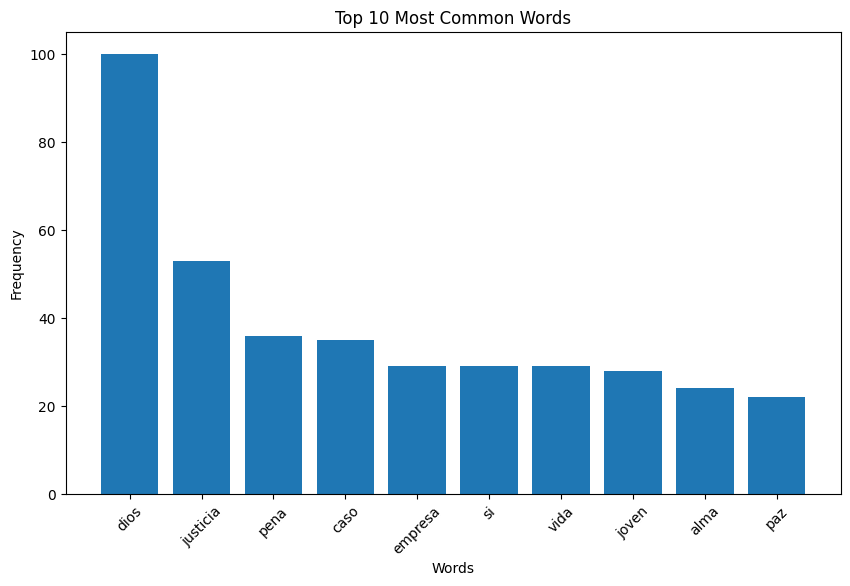

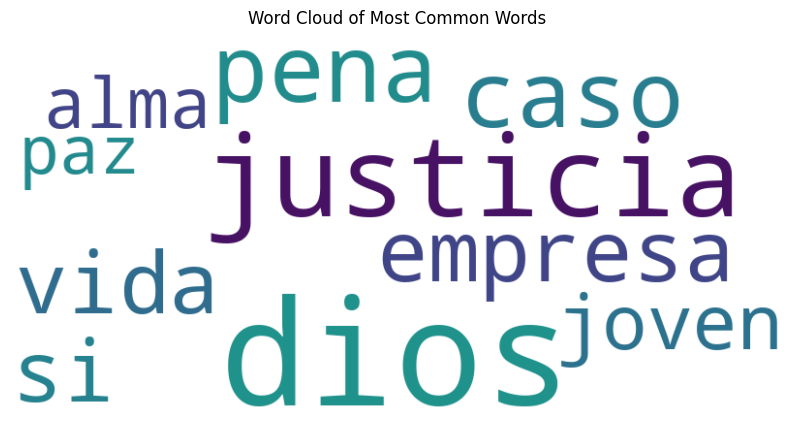

In [6]:
# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token.isalnum() and
              token not in stop_words]
    return tokens

# Preprocess comments column
df['preprocessed_comments'] = df['data'].apply(preprocess_text)

# Flatten the list of tokens
tokens = [token for sublist in df['preprocessed_comments'] for
          token in sublist]

# Count word frequencies
word_freq = Counter(tokens)

# Get the most common words
most_common_words = word_freq.most_common(10)

# Plot word frequencies
plt.figure(figsize=(10, 6))
words, frequencies = zip(*most_common_words)
plt.bar(words, frequencies)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate_from_frequencies(
                          dict(most_common_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

From this results, we can interpret these words and extrapolate their meaning in this context:

1. Dios - God: The Dominican Republic is a religious country, with Christianism as the most important religion. Expressions like "Oh, God", "Oh, my God" or regular condolences

2. Justicia - Justice: As we would expect, this was a very solid case in terms of the precedents and the nature of the crime, so people would naturally be expecting a fast-clear outcome. But, it could also be a result of the social perception of the Justice's System. People might feel that if there are no strong demands for "justice" to be applied, a case might not be solved.

3. Caso - Case: This is also following the previous idea, which provides more evidence for the reaction of demanding "justice".

4. Pena - Sad or Sentence (Law): In this case, this word might refer to "the feeling of profound sadness" or "the punishment imposed according to the law by judges or courts on those responsible for a crime or offense" (Real Academia de la Lengua Española).

5. Si - If. Probably due to the large amount of conditional statements.

6. Vida - Life.

7. Empresa - Company: Many comments might have been blaming and attacking the company for the way they handled the harassment complaint made by the victim.

8. Joven - Young: The victim was young and it might be one of the biggest shocks and concerns.

9. Alma - Soul: Religion and beliefs from the Dominican population again reflected here.

10. Pobre - Poor: Could refer to being economically "poor" or feeling inmensely bad for the "poor" victim.



### 2.1.4 Concordance Analysis

Now, let's apply concordance analysis to the top 10 words identified in the word frequency graph. This perspective would allow us to see the top words in context, to spot how they usually appear in the text.

In [7]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import ConcordanceIndex

# Top 10 words
top_words = ['dios', 'justicia', 'caso', 'pena', 'si', 'vida', 'empresa',
             'joven','alma','pobre']

# Tokenize comments
df['tokens'] = df['data'].apply(lambda x: word_tokenize(x.lower()))

# Concatenate tokens from all comments
all_tokens = [token for tokens in df['tokens'] for token in tokens]

# Perform concordance analysis for each top word
print("Concordance analysis for top 10 words:")
for word in top_words:
    concordance_index = ConcordanceIndex(all_tokens)
    concordance_index.print_concordance(word, width=50)
    print("\n")

Concordance analysis for top 10 words:
Displaying 25 of 100 matches:
s otros en este país . dios mio , como apagaron el
lto y no la dejaron ay dios , esa noticia me ha ca
nosé ahí hay algo raro dios que impotencia pobre c
o podía cumplirlo papá dios líbrame padre esa tarj
iene aterrada qué pena dios mío toma el control de
ora y casi profesional dios que dolor tiene el pue
nga que hacer justicia dios mio ten misericordia d
s sólo tengo que decir dios me libre , porque yo c
esto da una impotencia dios mio pobre chica dios n
a dios mio pobre chica dios nos libre nuestros hij
 puede quedar impune . dios ! que pena deben sanci
ación muy lamentable . dios mío justicia para esa 
 quejas te despiden ay dios , pero que caso tan tr
o tan triste ! ! ! que dios muestre los culpables 
n paz ! ! ! pobre niña dios mio wow que pena . que
delante justicia ! que dios la tenga en gloria dio
ios la tenga en gloria dios mio ya ni trabajando s
doctor bye ️ que abuso dios mío k pena dios mío ! 
 abuso dios m

## 2.2 Sentiment Analysis

### 2.2.1 Sentiment Analysis using TextBlob

For this task, the overall sentiment of the dataset is being analysed using TextBlob. The polarity score is a float within the range [-1.0, 1.0].

This algorithm is trained to work in English corpus, so it's not suitable for our dataset. However, we can use Google Translator to translate our comments and then apply TextBlob.

In [30]:
from deep_translator import GoogleTranslator

# Define function to translate comments
def translate_text(text):
    translation = GoogleTranslator(source='es',
                              target='en').translate(
                                  text)
    return translation

# Translate comments from Spanish to English
df['translated_comments'] = df['data'].apply(translate_text)

# Function to calculate sentiment score using TextBlob
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Perform sentiment analysis on each comment
sentiment_scores = []
for index, row in df.iterrows():
    comment_text = row['translated_comments']
    if isinstance(comment_text, str) and comment_text.strip():
        blob = TextBlob(comment_text)
        sentiment_score = blob.sentiment.polarity
        sentiment_scores.append(sentiment_score)
    else:
        sentiment_scores.append(None)

# Aggregate sentiment scores to get an overall sentiment score
# for the crime news post
valid_sentiment_scores = [score for score in
                          sentiment_scores if score is not None]

# Calculate overall sentiment score
if valid_sentiment_scores:
    overall_sentiment_score = sum(valid_sentiment_scores) /
    len(valid_sentiment_scores)
else:
    overall_sentiment_score = None
print("Overall Sentiment Score:", overall_sentiment_score)

Overall Sentiment Score: -0.05466377966035726


After receiving a negative (-0.055) which shows a slightly negative sentiment. I suspect that the algorithm doesn't work well on this dataset.

Let's check different comments individually to judge whether the result is acceptable.

In [43]:
comment_text = "😢Dios mio, como apagaron el sueño de esa joven,😢"
translated = GoogleTranslator(source='es',
                              target='en').translate(
                                  comment_text)
blob = TextBlob(translated)
sentiment_score = blob.sentiment.polarity
print(sentiment_score)
print(translated) # print translation

0.1
My God, how did they extinguish that young woman's dream?


We get a sentiment score of 0.1, showing it's slightly positive, which is not right.

In [39]:
comment_text = "Ay Dios, esa noticia me ha caído tan mal. 😞"
translated = GoogleTranslator(source='es',
                              target='en').translate(
                                  comment_text)
blob = TextBlob(translated)
sentiment_score = blob.sentiment.polarity
print(sentiment_score)
print(translated)
# We get a sentime score of -0.30, showing it's negative,
# which seems okay.

-0.2916666666666667
Oh God, that news hit me so hard. 😞


We get a sentime score of -0.30, showing it's slightly negative, but it should be maybe more negative.

In [47]:
comment_text = "Diantre pobre muchacha no pudo realizar sus \
sueños 😢😔por unos azarosos…"
translated = GoogleTranslator(source='es',
                              target='en').translate(
                                  comment_text)
blob = TextBlob(translated)
sentiment_score = blob.sentiment.polarity
print(sentiment_score)
print(translated)

-0.18333333333333335
Damn poor girl couldn't make her dreams come true 😢😔 because of some random people...


We get a sentiment score of -0.18, showing slightly negative sentiment.

In [48]:
comment_text = "Si la familia de ESA muchacha tiene dinero se resuelve \
de una vez ya lo saben pero si no tienen la población debe meter presión \
para que se resuelva si no no se resuelve"
translated = GoogleTranslator(source='es',
                              target='en').translate(
                                  comment_text)
blob = TextBlob(translated)
sentiment_score = blob.sentiment.polarity
print(sentiment_score)
print(translated)

0.0
If THAT girl's family has money, it can be resolved once and for all, they already know it, but if they don't, the population must put pressure on it to resolve it, if not, it cannot be resolved.


We get a sentiment score of 0.0, showing it's neutral, which doesn't seem to be accurate, and it shows that the algorithm might not work well on long comments.

In [44]:
comment_text = "Pobre muchacha, qué pena me da este caso.😢"
translated = GoogleTranslator(source='es',
                              target='en').translate(
                                  comment_text)
blob = TextBlob(translated)
sentiment_score = blob.sentiment.polarity
print(sentiment_score)
print(translated)
# This one seems to be okay, and it shows a particular
# common use of words.

-0.45
Poor girl, how sad this case makes me.😢


This one seems to be okay, and it shows a particular common use of adjectives and adverbs to express negative emotions (sadness in this case).

In [49]:
comment_text = "Y según la empresa, las cámaras del entorno donde \
fue encontrada no funcionaban. Ojalá y este caso no se quede sin justicia \
como muchos otros en este país."
translated = GoogleTranslator(source='es',
                              target='en').translate(
                                  comment_text)
blob = TextBlob(translated)
sentiment_score = blob.sentiment.polarity
print(sentiment_score)
print(translated)

0.25
And according to the company, the cameras in the area where she was found were not working. Hopefully this case will not be left without justice like many others in this country.


This obtains a positive score, which might not be right. The reason for this could be that the person used the word "Ojalá" which *denotes a strong desire for something to happen* (Real Academia Española). But, in this context, the person wants the case to be solved, not like many others that were left unsolved, which might be a negative sentiment more than positive. Of course, this idea might be too ambigous for the algorithm to identify.

In general, the code works well in some instances, especially for short comments with a common usage of language. But for others, especially long comments or comments with non common usage of language or ambigous words, it doesn't work so well or it might misclassify.

### 2.2.2 Sentiment Analysis using Sentiment-Spanish Library

Let's apply sentiment-spanish, which is a python library that uses convolutional neural networks to predict the sentiment of spanish sentences. The function sentiment(text) returns a number between 0 and 1. This is the probability of string variable text of being "positive".

In [41]:
!pip install sentiment-analysis-spanish
!pip install keras tensorflow
from sentiment_analysis_spanish import sentiment_analysis

sentiment = sentiment_analysis.SentimentAnalysisSpanish()

# Function to calculate sentiment score using SentimentAnalysisSpanish
def calculate_sentiment_score(text):
    return sentiment.sentiment(text)

# Calculate sentiment score for original comments
sentiment_scores = df['data'].apply(calculate_sentiment_score)

# Aggregate sentiment scores
overall_sentiment_score = sentiment_scores.mean(skipna = True)

print("Overall Sentiment Score:", overall_sentiment_score)

Overall Sentiment Score: 0.23349619161771534


In this case, we receive a neutral value 0.23 (not close to zero nor 1). This might be do to the fact that the model was trained on user rate reviews (itenedor, decathlon, tripadvisor, filmaffinity and ebay), and the usage of language might differ from the crime news comments.

## 2.3 Topic Modeling Analysis: Latent Dirichlet Allocation

Now, let's apply a topic modeling technique, Latent Dirichlet Allocation (LDA), to extract topics from the corpus.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import pandas as pd

df = pd.read_csv('diariolibre1.csv')
df['data'] = df['data'].astype('str')

# Function to preprocess text and remove stop words
def preprocess_and_remove_stopwords(text):
    tokens = text.split()
    cleaned_tokens = [token.lower().strip('.,?!') for
                      token in tokens
                      if token.lower().strip('.,?!')
                      not in stopwords.words('spanish')]
    return ' '.join(cleaned_tokens)

# Preprocess comments and remove stop words
df['data'] = df['data'].apply(preprocess_and_remove_stopwords)

# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['data'])

# Train the LDA model
lda_model = LatentDirichletAllocation(n_components=10, max_iter=10,
                                      learning_method='online',
                                      random_state=42)
lda_model.fit(X)

# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i]
                          for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

n_top_words = 10  # Number of top words to display for each topic
feature_names = vectorizer.get_feature_names_out()

# Display top words for each topic
top_words = get_top_words(lda_model, feature_names, n_top_words)
for i, words in enumerate(top_words):
    print(f"Topic {i + 1}: {' '.join(words)}")

Topic 1: impune quede así justicia caso nuriapiera aliciaortegah puede quedar joven
Topic 2: política rd antemano viene veces van ocultado legislativos dirige leyes
Topic 3: si empresa humanos familia debe recursos justicia caso foto sociedad
Topic 4: paz alma joven justicia dios país familia caso lamentable muerte
Topic 5: misericordia dios ten señor padre mundo amado oh familiares líbranos
Topic 6: saber amén violada seguro dejó olvido quiénes asesino tecnología violador
Topic 7: pena dios vida pobre caso sueños triste da muerte joven
Topic 8: dios justicia mio haga nadie país hijo libre tanta padre
Topic 9: mundo personas investiguen si serca jóvenes valores niños malas evitar
Topic 10: justicia empresa pueblo joven vida raro debe cámaras divina cámara


The results of the model provide more context into why the most common words were found in the descrptive analysis.

The topic 1 shows that when people talk about "justice" they also are worried about "impunity", or the case not being solved. They also mention "Alicia Ortega" and "Nuria Piera", who are the most influential journalists of the country, receiving a lot of respect from the population. Both have investigated many cases of different nature and have provided sufficient evidence to make a case. In this sense, we can sense how people perceive the Justice System as being so weak that they expect third-parties to participate and help solve the case.

The second topic is also interesting, and could be an initital point to start thinking about how to model people's opinions on public matters to motivate policy changes. It might refer to the politics or politician responsibilities regarding the legislative frameworks that regulate harassment issues.

The model's findings offer valuable insights into the underlying reasons behind the commonality of the words identified in the descriptive analysis.

Topic 1 sheds light on the correlation between discussions about "justice" and concerns regarding "impunity" which refers to the potential lack of these type of cases not being solved. Moreover, it contains the names of the two most influential journalists of the country:  "Alicia Ortega" and "Nuria Piera". Renowned for their investigative prowess across various cases, these journalists are perceived as pivotal figures capable of substantiating claims with compelling evidence. This observation hints at a prevailing sentiment regarding the perceived weakness of the Justice System, motivating people to claim from help to external actors in order for cases to be solved.

Equally noteworthy is the second topic, which presents an intriguing avenue for exploring public sentiments on societal issues—a crucial step in catalyzing policy changes. This topic likely refers to discussions surrounding political accountability and the responsibilities of policymakers in developing legislative frameworks and its application to address harassment issues effectively.

These insights not only deepen our understanding of public perceptions but also provide a starting point for modeling opinions on public matters—a pivotal endeavor in advocating for meaningful policy reforms.

# 3. Conclusion and Final Comments

The results of this project showed that we can derive interesting insights of public perceptions of crime cases within a specific context. The work delves into the analysis of a crime news post, focusing on the case of Paula Santana—a young victim whose compelling narrative deeply resonated with many people. The tragic nature of the crime, occurring within the premises of her workplace and involving a suspect she had previously reported for harassment, motivated extensive discussions.

Consequently, Paula's story inspired different reactions from the population, providing a rich source of data through social media platforms for understanding prevailing sentiments and topics. Notable observations highlight public perceptions regarding the efficacy of the justice system and the accountability of policymakers in implementing legislation to safeguard vulnerable individuals. Paula's profile, a young woman with dreams and aspirations who suffered from workplace harassment, underscores the imperative for stronger regulations to compel companies to address such cases more effectively and prevent tragic outcomes.

However, the study acknowledges certain limitations. The analysis structure may benefit from refinement to enhance the quality of results, while potential biases in result interpretation due to the researcher's preconceived notions are noted. Furthermore, expanding the sample size to encompass diverse crime news cases could provide deeper insights into public reactions across varying circumstances and victim profiles. Additionally, considering not only primary comments but also responses can offer valuable insights into interaction dynamics within such discussions.

Future endeavors could explore language patterns and usage in these contexts to extrapolate formal concepts mapping them to policymaking reforms and catalyzing societal change. By delving deeper into these facets, we can provide a more comprehensive understanding of public perceptions surrounding crime and advocate for impactful social reforms.

# 4. References

1. A. M. G. A., S. Robledo and M. Zuluaga, "Topic Modeling: Perspectives From a Literature Review," in IEEE Access, vol. 11, pp. 4066-4078, 2023, doi: 10.1109/ACCESS.2022.3232939.

2. Bakri C. Haron, M., Z. Z. Abidin, S., Azmina M. Zamani, N., & ., . (2018). Visualization of Crime News Sentiment in Facebook. International Journal of Engineering & Technology, 7(4.38), 955-959. https://doi.org/10.14419/ijet.v7i4.38.27616


3. Clarke, N., Foltz, P. W., & Garrard, P. (2020). How to do things with (thousands of) words: Computational approaches to discourse analysis in Alzheimer’s disease. Cortex, 129, 446–463. https://doi.org/10.1016/j.cortex.2020.05.001


4. C. Zhu, H. Zhu, Y. Ge, E. Chen and Q. Liu, "Tracking the Evolution of Social Emotions: A Time-Aware Topic Modeling Perspective," 2014 IEEE International Conference on Data Mining, Shenzhen, China, 2014, pp. 697-706, doi: 10.1109/ICDM.2014.121.


5. Lipizzi, C., Dessavre, D. G., Iandoli, L., & Marquez, J. E. R. (2016). Towards computational discourse analysis: A methodology for mining Twitter backchanneling conversations. Computers in Human Behavior, 64, 782–792. https://doi.org/10.1016/j.chb.2016.07.030


6. Shivhare, S. N., & Khethawat, S. (2012, May 22). Emotion Detection from Text. arXiv.org. https://arxiv.org/abs/1205.4944